In [4]:
# Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# Import Data

data = pd.read_csv("D:\Elections_DataProject\election_results_2024.csv")
data.head()


,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
0,AJMER,13,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991,Result Declared
1,ALWAR,8,BHUPENDER YADAV,Bharatiya Janata Party,LALIT YADAV,Indian National Congress,48282,Result Declared
2,AMBALA,1,VARUN CHAUDHRY,Indian National Congress,BANTO KATARIA,Bharatiya Janata Party,49036,Result Declared
3,ANANTNAG-RAJOURI,3,MIAN ALTAF AHMAD,Jammu & Kashmir National Conference,MEHBOOBA MUFTI,Jammu & Kashmir Peoples Democratic Party,281794,Result Declared
4,ARAKKONAM,7,S JAGATHRATCHAKAN,Dravida Munnetra Kazhagam,L VIJAYAN,All India Anna Dravida Munnetra Kazhagam,306559,Result Declared


Total Seats Won Analysis

C:\Users\dewan\AppData\Local\Temp\ipykernel_7820\2453080661.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=party_seats.index, y=party_seats.values, palette='viridis')


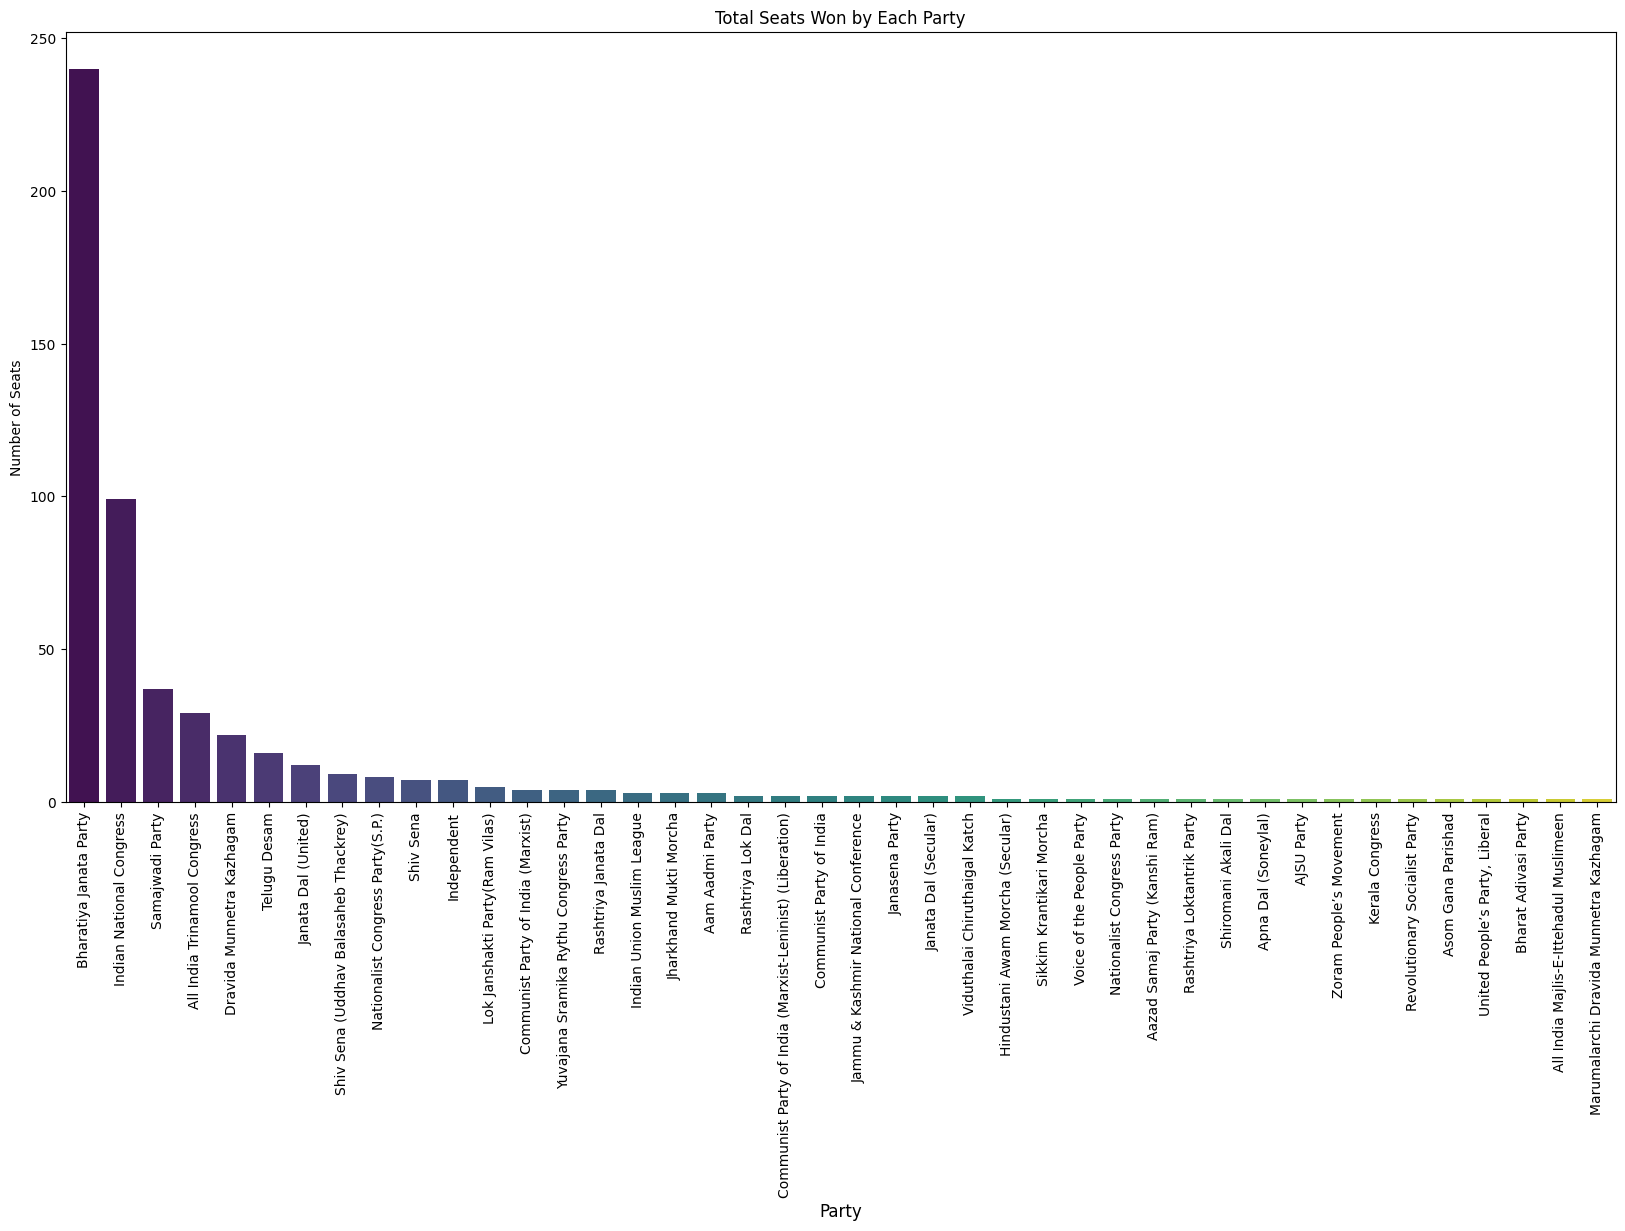

In [8]:
# Total Seats Won by Each Party

party_seats = data['Leading Party'].value_counts()
party_seats

# Plotting the Total Seats Won by Each Party

plt.figure(figsize=(20,10))
sns.barplot(x=party_seats.index, y=party_seats.values, palette='viridis')
plt.title('Total Seats Won by Each Party')
plt.xlabel('Party',fontsize=12)
plt.xticks(rotation=90)
plt.ylabel('Number of Seats')
plt.show()

Seats won with Highest and Lowest Margins

In [19]:
margin = data['Margin']
margin = pd.to_numeric(data['Margin'],errors='coerce')    
highest_margin = data.loc[margin.idxmax()]
lowest_margin = data.loc[margin.idxmin()]

# Highest
highest_margin
# Lowest
lowest_margin


Constituency                              Mumbai North West
Const. No.                                               27
Leading Candidate                  RAVINDRA DATTARAM WAIKAR
Leading Party                                     Shiv Sena
Trailing Candidate                    AMOL GAJANAN KIRTIKAR
Trailing Party        Shiv Sena (Uddhav Balasaheb Thackrey)
Margin                                                   48
Status                                      Result Declared
Name: 357, dtype: object

Star Candidate Constituencies

In [26]:
# Fix Boolean Indexing
NarendraModi = data[data['Margin'] == 'Narendra Modi']
AmitShah = data[data['Margin'] == 'Amit Shah']
RahulGandhi = data[data['Margin'] == 'Rahul Gandhi']
PriyankaGandhi = data[data['Margin'] == 'Priyanka Gandhi']
ShankarLalwani = data[data['Margin'] == 'Shankar Lalwani']

# Fix value retrieval
ModiSeat = NarendraModi['Constituency'].values[0] if not NarendraModi.empty else None
ShahSeat = AmitShah['Constituency'].values[0] if not AmitShah.empty else None
RahulSeat = RahulGandhi['Constituency'].tolist()  if not RahulGandhi.empty else None # Since he fought from 2 places
PriyankaSeat = PriyankaGandhi['Constituency'].values[0] if not PriyankaGandhi.empty else None
LalwaniSeat = ShankarLalwani['Constituency'].values[0] if not ShankarLalwani.empty else None

# Fix DataFrame construction
Stars = pd.DataFrame({
    'Candidate': ['Narendra Modi'] * len(RahulSeat) + ['Narendra Modi', 'Amit Shah', 'Priyanka Gandhi', 'Shankar Lalwani'],
    'Constituency': RahulSeat + [ModiSeat] + [ShahSeat, PriyankaSeat, LalwaniSeat]
})

Stars

TypeError: object of type 'NoneType' has no len()